In [2]:
#Import all of the necessary packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.html.widgets import interact, fixed
import ipywidgets as widgets
import math

import io

font_plt = {'family': 'serif',
            'color':  'darkred',
            'weight': 'normal',
            'size': 10,
            }
font_plt_ax = {'family': 'serif',
               'color':  'black',
               'weight': 'normal',
               'size': 10,
              }
import sys
import glob #glob is helpful for searching for filenames or directories
import ddm_clean as ddm #this is the module containing the differential dynamic microscopy code
import scipy #scientific python
from scipy.signal import blackmanharris as bh #for Blackman-Harris windowing
import pickle #for saving data
import mpld3
%matplotlib inline
mpld3.enable_notebook()

data_dir = "Z:\\Devynn_Summer2018\\Data\\2018-06-11_examples\\Beads_1\\"
data_file = "graphResults_beads1.p"
dat = pickle.load(open(data_dir + data_file,'r'))



C:\Users\Student\Anaconda2\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
tiff_file.py:1995: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
tiff_file.py:1995: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
tiff_file.py:1995: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


In [3]:
newt = lambda t,s: (1./s)*gamma(1./s)*t
px = 0.189
imDimension = 128
ROI = ['0', '128', '256', '384', '512', '640', '768', '896']
q = np.arange(0,imDimension/2)*2*np.pi*(1./(imDimension*px*2))


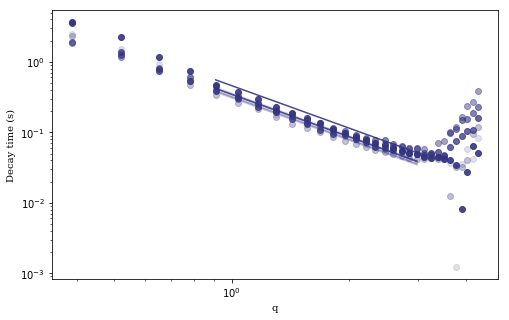

In [27]:
#Plot the decay time versus the wave vector
fig = plt.figure(figsize=(8,8/1.618)); ax = fig.gca(); 
#Color list
#Plotting all 8 plots on one graph
for i in range (0,7):
    tau = dat["tau"+ROI[i]]
    alph = dat["alpha"+ROI[i]]
    decaytime = ddm.newt(tau,alph)
    decaytime1 = ddm.newt(tau[2:-30],alph[2:-30])
    decaytime2 = ddm.newt(tau[6:-35],alph[6:-35])
    
    ax.loglog(q[3:-30],decaytime1 ,c=(.2, 0.2, 0.5),marker = 'o',linestyle = '',alpha= .15*i)  
  
    ## Fitting the data tau = Dq^-2
    def Diff_Fit(qrange, taurange, qmin, qmax, StExp):
        step1 = DiffCoef(taurange, StExp, qrange, qmin, qmax)
        fit1 = (1./step1) * 1./(qrange**2)
        return fit1, step1
    
    def DiffCoef (tau, StretchExp, qrange, qmin, qmax):
        nt = ddm.newt(tau, StretchExp)
        indx = (qrange>qmin) & (qrange<qmax)
        ds = (qrange[indx]**-2) / nt[indx]
        return ds.mean()

#     def plot_results(qmin = q[2], qmax = q[10]):
#         qs = q[3:-1]
#         taus = tau[2:-1]
#         fig,ax = plt.subplots(figsize=(8,8/1.618))
#         ax.loglog(qs, tau[2:-1], 'ro')
#         ax.loglog(qs, ddm.newt(taus ,alph[2:-1]),'bo')
#         fits = Diff_Fit(qs,taus, qmin, qmax, alph[2:-1])
#         ax.plot(qs, fits[0],  '-k')
#         ax.text(0.55,0.8,'D = %.2f' %fits[1], 
#             fontdict=font_plt,horizontalalignment='left', 
#             verticalalignment='center', transform=ax.transAxes)
   
    taus = tau[2:-1]
    StExp = alph[2:-1]
    qrange = q[3:-1]
    qmin = q[2]
    qmax = q[10]
    
    diffusioncoeff = DiffCoef(taus, StExp, qrange, qmin, qmax)

    ax.plot(q[7:-40], (1./diffusioncoeff) * 1./(q[7:-40]**2), '-',c=(.2, 0.2, 0.5),alpha = .15*i)
    plot_results
    ax.set_xlabel("q", fontdict=font_plt_ax)
    ax.set_ylabel("Decay time (s)", fontdict=font_plt_ax)
    
 
   
 

In [22]:
len(decaytime2)

22

In [23]:
q[7:-35]

array([0.90902565, 1.03888646, 1.16874727, 1.29860807, 1.42846888,
       1.55832969, 1.6881905 , 1.8180513 , 1.94791211, 2.07777292,
       2.20763373, 2.33749453, 2.46735534, 2.59721615, 2.72707696,
       2.85693776, 2.98679857, 3.11665938, 3.24652019, 3.37638099,
       3.5062418 , 3.63610261])